# Classificação Binária Multirrótulo (Spam/Urgente)


### Introdução
Neste exemplo, vamos trabalhar com um problema de **classificação binária multirrótulo**, onde queremos prever se uma mensagem de e-mail é **Spam** ou **Urgente**.
Para isso, utilizaremos uma rede neural que vai classificar os e-mails em duas classes, cada uma representada por um rótulo binário.
A ideia é que a rede neural possa aprender a distinguir mensagens que são **Spam** ou **Urgentes**, utilizando o conjunto de dados de exemplo.


In [1]:

# Importação das bibliotecas
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer


np.random.seed(42)
tf.random.set_seed(42)
init = tf.keras.initializers.GlorotUniform(seed=42)



### Carregando e Preparando os Dados
Primeiramente, vamos carregar os dados. Para este exemplo, consideramos um conjunto de dados simples com mensagens de e-mail.
Cada mensagem será etiquetada como **Spam** ou **Urgente**, e nosso objetivo será treinar um modelo para classificar novas mensagens nessas categorias.


In [2]:
data = {
    'message': [
        'Win a free iPhone!', 'Urgent! Your account is suspended', 'Limited offer, get cash now',
        'Important: Tax form is due', 'Urgent action required', 'Free gift card! Claim now',
        'Important update from your bank', 'Exclusive deal for you', 'Urgent request for payment',
        'Win a prize, just reply now!', 'Your account has been compromised, reset your password', 'Offer ends today, act now!',
        'Claim your free cruise vacation!', 'Urgent notice from customer support', 'Hurry! Limited time sale on electronics',
        'You won a gift card! Respond to claim', 'Important: update your billing information', 'Get cash instantly, click here',
        'Exclusive offer for members only', 'Your account is about to expire, renew now', 'Amazing discount just for you!',
        'Confirm your free trial now!', 'Urgent: your order has been delayed', 'You have a new message from your bank',
        'Final chance for 50% off!', 'Urgent! Verify your account to avoid suspension', 'Prize awaits, claim it now!',
        'Limited time only! Free gift with purchase', 'Important: System update required immediately', 'Act now to save big on electronics',
        'Get a free laptop, just pay shipping', 'Important update on your recent transaction', 'Urgent: You’ve been selected for a prize!',
        'Limited time only: Get your free trial', 'Important: payment overdue', 'Claim your free e-book now!', 'Urgent: your verification is required',
        'Don’t miss out on this exclusive offer!', 'Security alert! Update your password immediately', 'Important: your subscription expires soon',
        'You’ve been selected for a special offer', 'Last chance to get a discount on your order', 'Hurry! Offer expires at midnight',
        'Urgent! Your account has been locked', 'Claim your free credit card now!', 'Huge discount on travel packages, limited seats!',
        'Exclusive: Special offer just for you', 'Important: Your password has been compromised', 'Hurry! Limited stock left',
        'Sign up today to get a free trial!', 'Important: Your payment is due', 'Urgent: Verify your identity to avoid account suspension',
        'Exclusive offer for VIP members!', 'Final reminder: claim your free gift!', 'Important: Action required for your account',
        'You’ve won a free iPad!', 'Urgent: Bank account update required', 'Don’t miss this once-in-a-lifetime offer',
        'Urgent! Respond now to claim your prize', 'Sign up now and get a free trial', 'Claim your 30% discount on all products',
        'Important: Verify your payment details', 'Urgent: last chance to renew your membership', 'Free consultation, book now!',
        'Win a free smartphone, limited time offer', 'Important: you’ve been selected for a special prize', 'Urgent: Update your account settings now',
        'Urgent notice: Your subscription will expire soon', 'Get a free gift with your purchase today', 'Last call for your exclusive discount!',
        'Important: Verify your email to avoid account suspension', 'Hurry! Limited time offer on travel packages', 'Urgent: Confirm your address immediately',
        'You’ve been selected for a free vacation!', 'Urgent: Action required on your order', 'Claim your free trial today!',
        'Exclusive offer: Get a free consultation', 'Important: Your subscription is about to end', 'Act fast! Free products for limited time',
        'Urgent: Your payment is pending', 'Don’t miss your chance to win a free gift card!', 'Get your free trial now!',
        'Important: Your recent transaction was declined', 'Exclusive offer for a limited time only', 'Urgent! Respond to this message immediately',
        'Last chance for a huge discount on electronics', 'Important: Update your contact information', 'Get your free vacation package now',
        'Urgent: Final reminder to verify your account', 'Claim your free consultation today', 'You’ve been selected for a limited-time offer',
        'Important: Your account has been temporarily suspended', 'Hurry! 80% off for the next 2 hours', 'Urgent: Verify your payment method now',
        'Claim your free smartwatch today!', 'Final offer: Get a free trial of our service', 'Urgent: Confirm your account settings to avoid suspension',
        'Get a free consultation with our expert!', 'Urgent: Your account is at risk of being suspended', 'Exclusive: Free gift with your purchase',
        'Important: Your trial period is about to end', 'Act now to get free access to premium content', 'Last chance for a special discount on all products',
        'Important: Confirm your details to continue using our service', 'Claim your free gift now, limited stock!', 'Urgent: Action required to avoid account suspension',
        'Exclusive access to a limited-time offer', 'Important: Verify your payment details', 'You’ve been selected to win a free vacation',
        'Hurry! Offer ends soon, get your discount now', 'Urgent! Your account will be locked if not verified', 'Final reminder: renew your membership now',
        'Get a free bonus with your purchase today', 'Urgent: You need to update your billing information', 'Special offer for new customers only',
        'Urgent: Respond to claim your free gift', 'Last chance to apply for a free trial', 'You’ve won a free trip, claim it now!',
        'Urgent: Review your account settings', 'Claim your free gift card now', 'Don’t miss your chance to get a free phone!',
        'Hurry! Limited stock available for this special offer', 'Urgent: Respond now to avoid account suspension', 'Important: Confirm your purchase',
        'Exclusive offer for first-time customers', 'You’ve won a free shopping spree!', 'Important: Update your contact details to avoid account issues',
        'Claim your 50% discount on all products today', 'Urgent: Verify your payment details to continue using our service', 'Hurry! Last chance for a free consultation'
    ],
    'label': ['Spam', 'Urgente', 'Spam', 'Urgente', 'Urgente', 'Spam', 'Urgente', 'Spam', 'Urgente', 'Spam',
              'Spam', 'Urgente', 'Spam', 'Urgente', 'Spam', 'Urgente', 'Spam', 'Spam', 'Urgente', 'Spam',
              'Urgente', 'Spam', 'Spam', 'Urgente', 'Urgente', 'Spam', 'Urgente', 'Spam', 'Spam', 'Urgente',
              'Spam', 'Spam', 'Urgente', 'Spam', 'Spam', 'Urgente', 'Urgente', 'Spam', 'Spam', 'Urgente',
              'Spam', 'Urgente', 'Spam', 'Urgente', 'Spam', 'Spam', 'Urgente', 'Spam', 'Spam', 'Urgente',
              'Spam', 'Urgente', 'Spam', 'Spam', 'Urgente', 'Spam', 'Urgente', 'Spam', 'Spam', 'Urgente',
              'Spam', 'Spam', 'Urgente', 'Spam', 'Spam', 'Urgente', 'Spam', 'Urgente', 'Spam', 'Spam',
              'Urgente', 'Spam', 'Spam', 'Urgente', 'Spam', 'Urgente', 'Spam', 'Spam', 'Urgente', 'Spam',
              'Spam', 'Urgente', 'Spam', 'Spam', 'Urgente', 'Spam', 'Urgente', 'Spam', 'Spam', 'Urgente',
              'Spam', 'Urgente', 'Spam', 'Spam', 'Urgente', 'Spam', 'Spam', 'Urgente', 'Spam', 'Urgente',
              'Spam', 'Spam', 'Urgente', 'Spam', 'Spam', 'Urgente', 'Spam', 'Urgente', 'Spam', 'Spam',
              'Urgente', 'Spam', 'Urgente', 'Spam', 'Spam', 'Urgente', 'Spam', 'Urgente', 'Spam', 'Spam',
              'Urgente', 'Spam', 'Urgente', 'Spam', 'Spam', 'Urgente', 'Spam', 'Urgente', 'Spam', 'Spam'
    ]
}
print(len(data.get('label')), len(data.get('message')))

130 130


In [3]:

# Gerando um conjunto de dados fictício para exemplificação
# A primeira coluna são as mensagens, a segunda são os rótulos (Spam/Urgente)
df = pd.DataFrame(data)

# Convertendo as labels (Spam/Urgente) em valores binários
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])  # Spam=0, Urgente=1

# Exibindo as primeiras linhas do dataframe
df.head()


,message,label
0,Win a free iPhone!,0
1,Urgent! Your account is suspended,1
2,"Limited offer, get cash now",0
3,Important: Tax form is due,1
4,Urgent action required,1



### One-Hot Encoding e Preparação dos Dados
Agora, vamos transformar a variável de **rótulos** em **One-Hot Encoding**.
Esta transformação é necessária porque o modelo precisa aprender as probabilidades associadas a cada classe de forma mais eficiente.


In [4]:

# Aplicando One-Hot Encoding nos rótulos
y = to_categorical(df['label'], 2)

# Separando os dados em variáveis de entrada e saída
X = df['message']
vectorizer = TfidfVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X).toarray()  #

# Neste exemplo, vamos assumir que X já é pré-processado (transformado em vetores de features)
# Para simplificação, usaremos X com a mesma forma apenas para a demonstração.
# Em um caso real, as mensagens seriam vetorizadas utilizando técnicas como TF-IDF ou embeddings.
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# Exibindo os primeiros elementos de X e y para verificar
X_train[:2], y_train[:2]


(array([[0.        , 0.        , 0.        , 0.        , 0.31045472,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.40924625, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.55871208, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.29538603, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0


### Arquitetura do Modelo
Neste exemplo, utilizamos uma **rede neural densa (MLP)** para classificar os e-mails em **Spam** ou **Urgente**.
A rede neural terá camadas **densas**, com uma camada de entrada para os dados de entrada, camadas ocultas para aprender as representações dos dados, e uma camada de saída com 2 neurônios, representando as 2 classes do problema.

Justificativa para a arquitetura:
- **Camada de entrada**: A camada de entrada recebe os dados processados (mensagens de e-mail convertidas em vetores).
- **Camadas ocultas**: Usamos camadas com a função de ativação **ReLU** para aprender padrões não lineares.
- **Camada de saída**: Usamos **softmax** para gerar probabilidades, indicando a classe mais provável para cada entrada.


In [5]:

# Criando o modelo
inputs = X_test.shape[1]

modelo = Sequential()
modelo.add(Input(shape=(inputs,)))  # A entrada seria vetorizada, mas para exemplo, apenas 1 valor de entrada
modelo.add(Dense(128, activation='relu', kernel_initializer=init))  # Primeira camada densa com 64 neurônios e ReLU
modelo.add(Dense(64, activation='relu', kernel_initializer=init))  # Segunda camada densa com 32 neurônios e ReLU
modelo.add(Dense(32, activation='relu', kernel_initializer=init))  # Segunda camada densa com 32 neurônios e ReLU
modelo.add(Dense(16, activation='relu', kernel_initializer=init))  # Segunda camada densa com 32 neurônios e ReLU
modelo.add(Dense(2, activation='softmax', kernel_initializer=init))  # Camada de saída com 2 neurônios (Spam/Urgente)

# Compilando o modelo
modelo.compile(optimizer=Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Resumo do modelo
modelo.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,330 (114.57 KB)

 Trainable params: 29,330 (114.57 KB)

 Non-trainable params: 0 (0.00 B)


### Treinamento do Modelo
Agora, vamos treinar o modelo utilizando o conjunto de dados de treino. Vamos usar **100 épocas** para treinamento.


In [6]:
# Treinando o modelo
historico = modelo.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=2)
plt.show()


Epoch 1/100
4/4 - 2s - 556ms/step - accuracy: 0.5962 - loss: 0.6867 - val_accuracy: 0.5385 - val_loss: 0.6916
Epoch 2/100
4/4 - 0s - 23ms/step - accuracy: 0.6154 - loss: 0.6718 - val_accuracy: 0.5385 - val_loss: 0.6914
Epoch 3/100
4/4 - 0s - 34ms/step - accuracy: 0.6154 - loss: 0.6595 - val_accuracy: 0.5385 - val_loss: 0.6924
Epoch 4/100
4/4 - 0s - 38ms/step - accuracy: 0.6154 - loss: 0.6464 - val_accuracy: 0.5385 - val_loss: 0.6942
Epoch 5/100
4/4 - 0s - 24ms/step - accuracy: 0.6154 - loss: 0.6304 - val_accuracy: 0.5385 - val_loss: 0.6981
Epoch 6/100
4/4 - 0s - 24ms/step - accuracy: 0.6250 - loss: 0.6113 - val_accuracy: 0.5385 - val_loss: 0.7042
Epoch 7/100
4/4 - 0s - 33ms/step - accuracy: 0.6346 - loss: 0.5879 - val_accuracy: 0.5385 - val_loss: 0.7130
Epoch 8/100
4/4 - 0s - 25ms/step - accuracy: 0.6538 - loss: 0.5589 - val_accuracy: 0.5385 - val_loss: 0.7231
Epoch 9/100
4/4 - 0s - 35ms/step - accuracy: 0.6923 - loss: 0.5242 - val_accuracy: 0.5000 - val_loss: 0.7359
Epoch 10/100
4/4 -

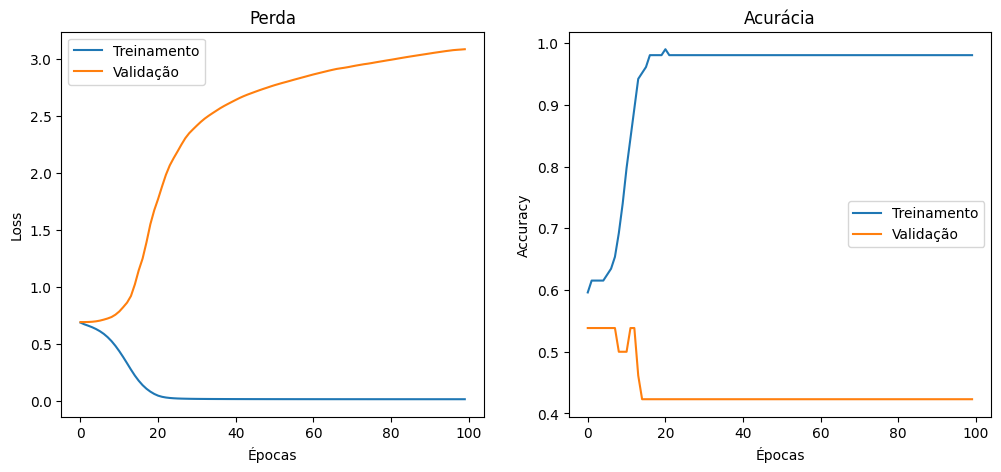

In [7]:
# Plotando o gráfico de perda (loss) e acurácia (accuracy)
plt.figure(figsize=(12, 5))

# Gráfico de perda
plt.subplot(1, 2, 1)
plt.plot(historico.history['loss'], label='Treinamento')
plt.plot(historico.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Gráfico de acurácia
plt.subplot(1, 2, 2)
plt.plot(historico.history['accuracy'], label='Treinamento')
plt.plot(historico.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()